In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

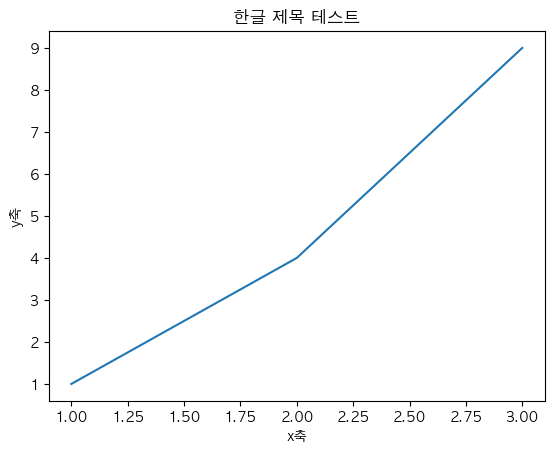

In [6]:
# 한글
plt.rcParams['font.family'] = 'AppleGothic'  # 맥북에서 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 음수 기호 깨짐 방지

plt.plot([1, 2, 3], [1, 4, 9])
plt.title("한글 제목 테스트")
plt.xlabel("x축")
plt.ylabel("y축")
plt.show()

In [14]:
df = pd.read_csv('lending_club_2020_train.csv', low_memory = False)

In [15]:
df.head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,124989905,6000.0,6000.0,6000.000000,36 months,7.97%,187.94,A,A5,Teacher,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,139665484,35000.0,35000.0,35000.000000,60 months,14.47%,822.95,C,C2,Product Specialist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,84253847,23200.0,23200.0,23200.000000,60 months,24.99%,680.82,E,E4,Production Foreman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
3,126296074,4500.0,4500.0,4500.000000,36 months,9.93%,145.06,B,B2,Office Manager,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,148913312,15000.0,15000.0,15000.000000,36 months,16.40%,530.33,C,C4,Secretary,...,May-2020,Jul-2020,May-2020,2.0,0.0,ACTIVE,413.83,11025.25,54.62,N
5,119708428,16000.0,16000.0,16000.000000,36 months,7.07%,494.55,A,A2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
6,109906493,4500.0,4500.0,4500.000000,36 months,10.42%,146.10,B,B3,Team Manager,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
7,60286250,20000.0,20000.0,20000.000000,36 months,9.99%,645.25,B,B3,teacher,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
8,151871973,19000.0,19000.0,18999.739941,60 months,17.97%,482.17,D,D1,Manager,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
9,152325146,35000.0,35000.0,35000.000000,36 months,8.19%,1099.85,A,A4,Chief Financial Officer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


##### 내생변수 제거 기준에 대한 논의 후 반영하면 좋을 듯

endog_vars = [
    'loan_status', 'int_rate', 'installment', 'funded_amnt', 'funded_amnt_inv',
    'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
    'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
    'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'issue_d',
]

prefixes = ['disbursement_method', 'hardship_', 'debt_settlement_', 'settlement_']
prefix_matches = [col for col in df.columns if any(col.startswith(p) for p in prefixes)]

prev = ['id', 'url']

all_vars_to_remove = endog_vars + prefix_matches + prev

df = df.drop(columns = all_vars_to_remove)

In [16]:
# 결측치 비율 확인
missing_percent = (df.isnull().mean() * 100).round(1)
missing_percent = missing_percent[missing_percent>0]
missing_percent.sort_values(ascending=False)

pd. set_option('display.max_rows', 1000)
print(missing_percent.sort_values(ascending=False))

hardship_start_date                           95.1
hardship_end_date                             95.1
deferral_term                                 95.1
hardship_status                               95.1
hardship_loan_status                          95.1
hardship_dpd                                  95.1
hardship_reason                               95.1
hardship_type                                 95.1
payment_plan_start_date                       95.1
hardship_length                               95.1
orig_projected_additional_accrued_interest    93.9
hardship_amount                               93.8
hardship_last_payment_amount                  93.8
hardship_payoff_balance_amount                93.8
sec_app_revol_util                            93.3
verification_status_joint                     93.3
sec_app_open_acc                              93.2
sec_app_open_act_il                           93.2
sec_app_num_rev_accts                         93.2
sec_app_chargeoff_within_12_mth

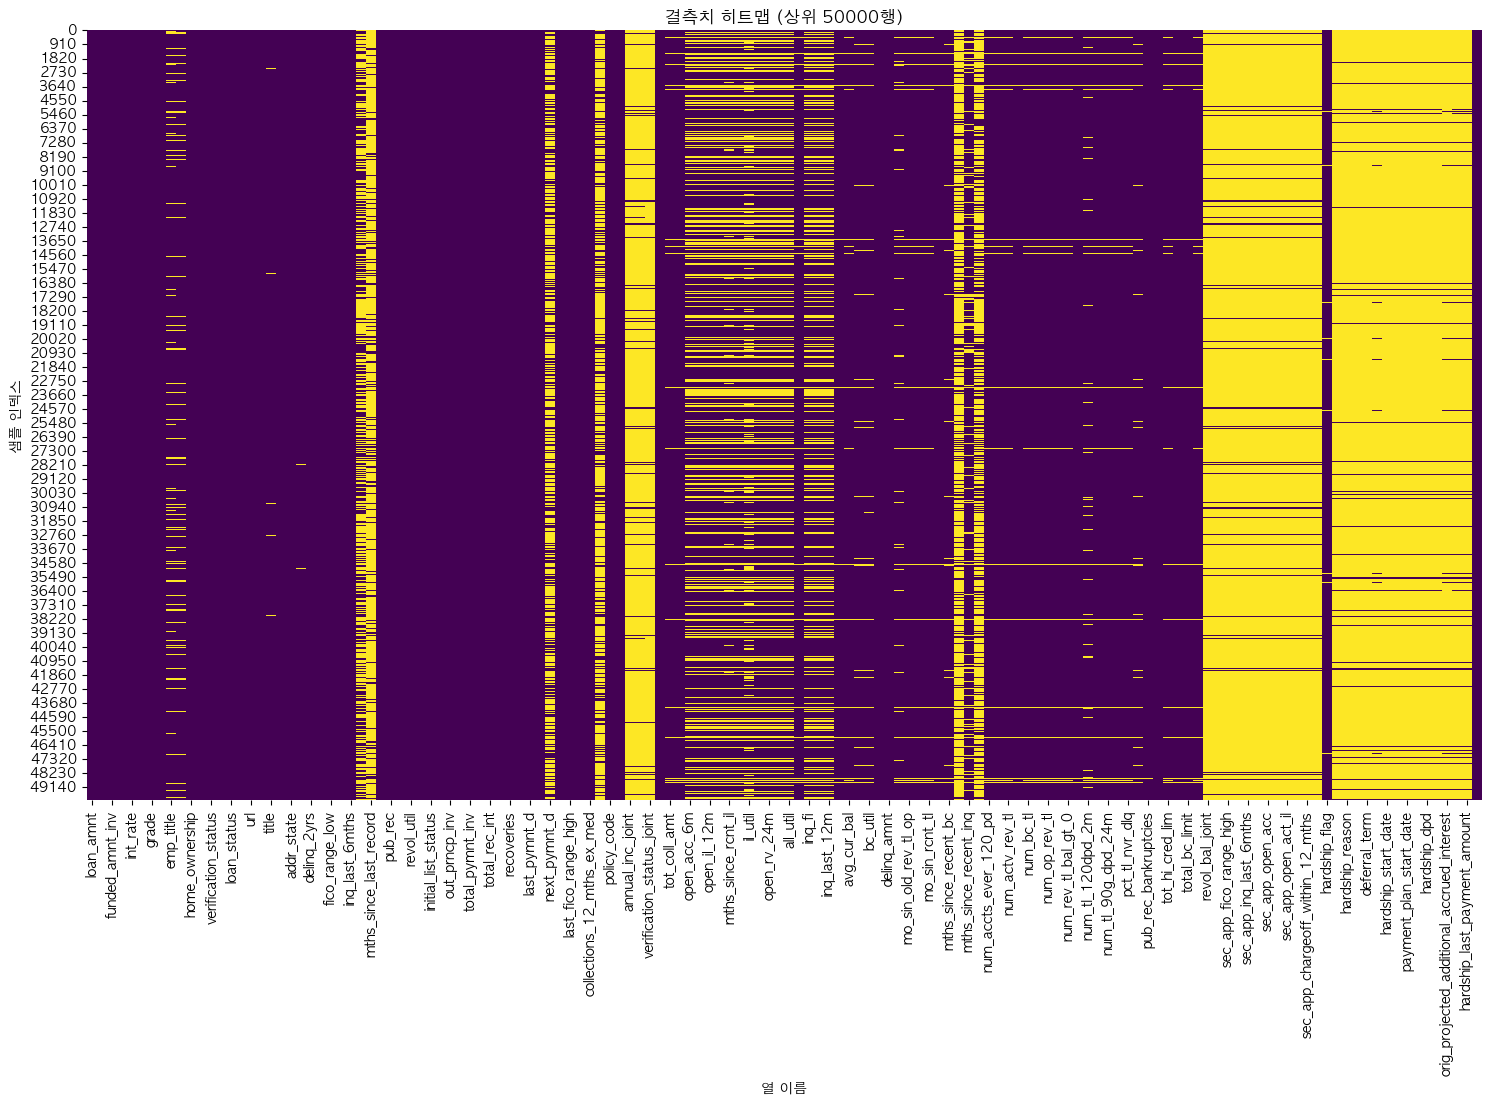

In [21]:
# 결측치 히트맵

# 1. 결측치 있는 열 필터링
missing_cols = df.columns[df.isnull().any()]
df_missing = df[missing_cols]

# 2. 샘플 수가 많으므로 앞쪽 일부 행만 시각화 (너무 많으면 느려져서)
df_sample = df_missing.head(50000) 

# 3. 히트맵 그리기
plt.figure(figsize=(18, 10)) 
sns.heatmap(df_sample.isnull(), cbar=False, cmap='viridis')  
plt.title('결측치 히트맵 (상위 50000행)')
plt.xlabel('열 이름')
plt.ylabel('샘플 인덱스')
plt.show()

In [18]:
# 변수 타입 확인
df.dtypes

id                                             object
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                                            object
purpose                     

### 아직 전처리가 안 들어간 상황
### 실제로는 실수 값이지만 문자열로 들어간 열들(e.g. emp_length;근속연수, term;대출년수)은
### 이하의 수치형 변수 분석에 들어가지 않은 상태입니다.

In [32]:
# 전처리 코드

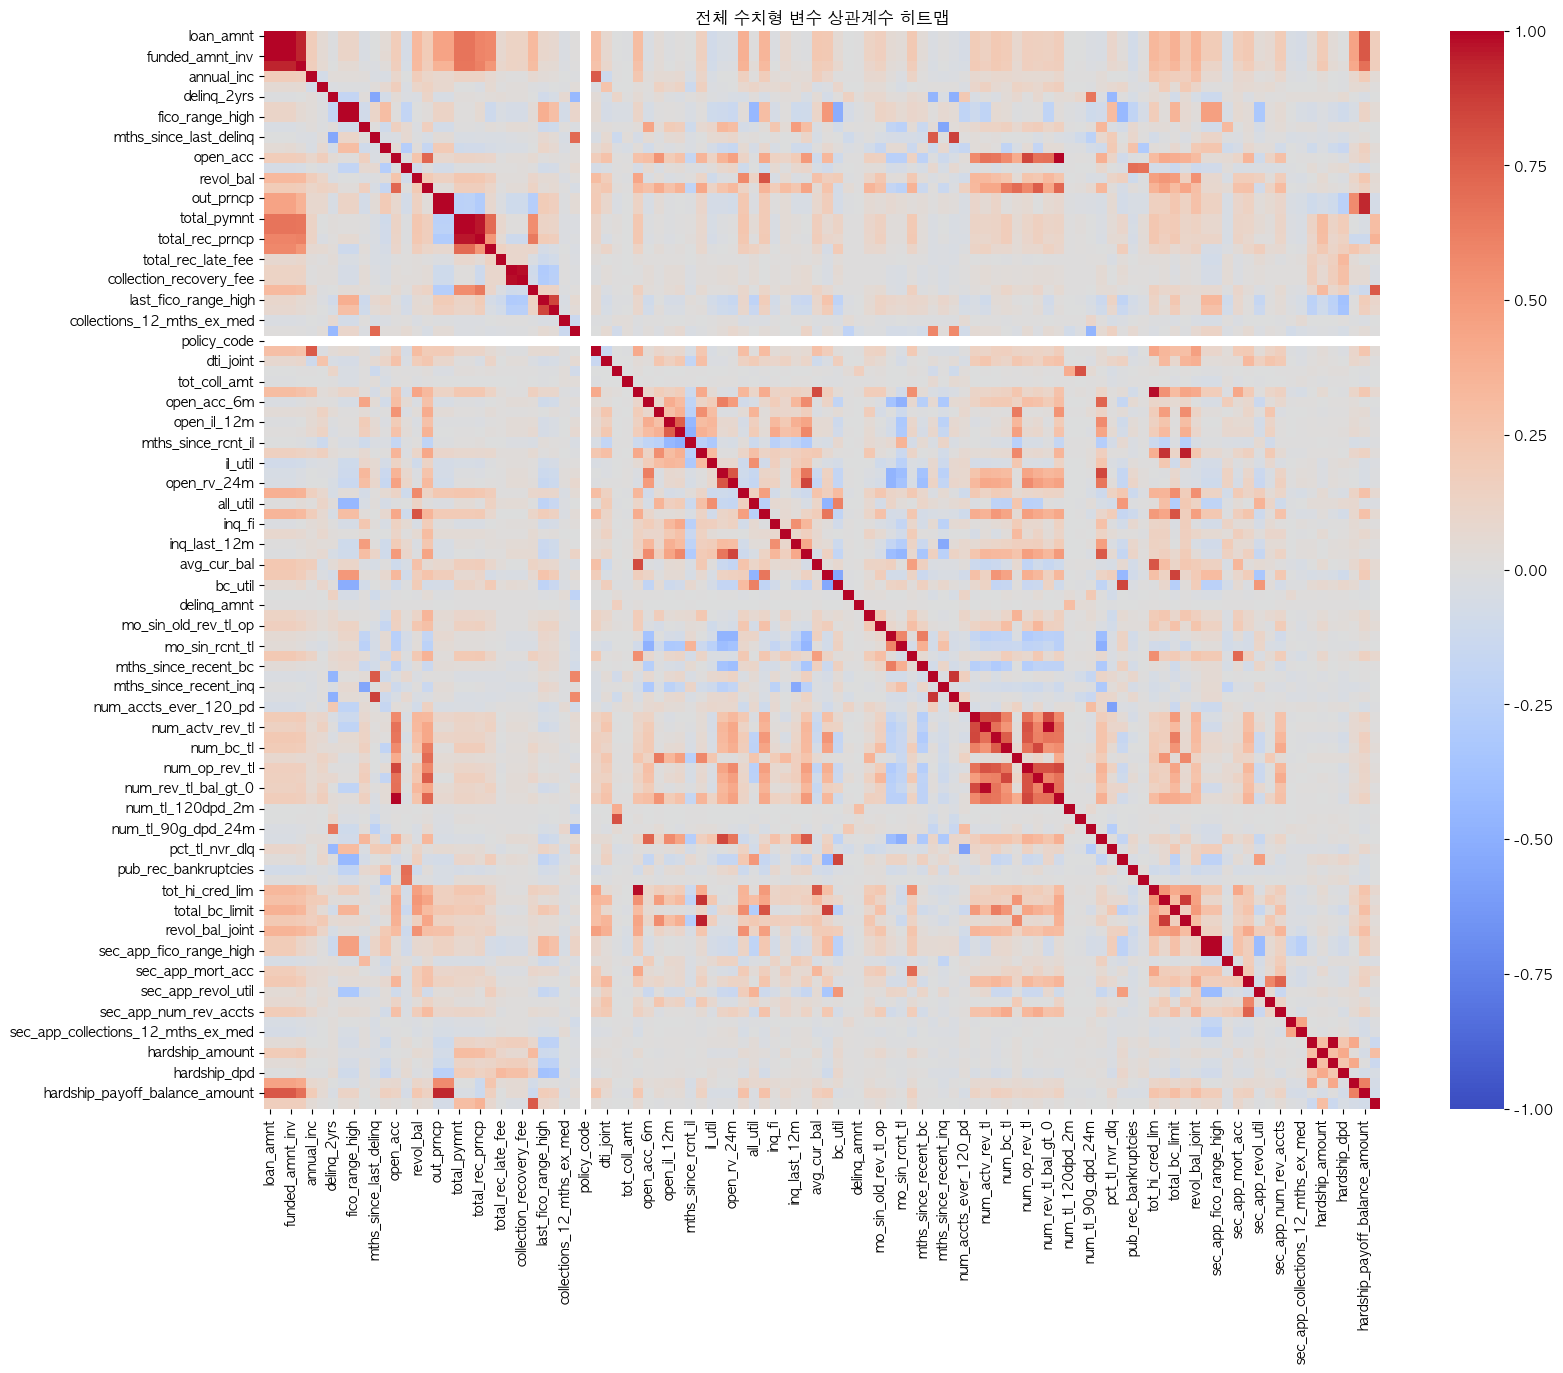

In [22]:
# 수치형 변수 간 상관관계 히트맵
num_cols = df.select_dtypes(include = 'number').columns
plt.figure(figsize=(18, 14))
sns.heatmap(df[num_cols].corr(), cmap='coolwarm', vmin =- 1, vmax=1)
plt.title('전체 수치형 변수 상관계수 히트맵')
plt.show()

In [31]:
# 수치형 변수들 중 상관관계 높은 변수들 확인 

# 1. 상관계수 계산
num_df = df.select_dtypes(include = "number")
corr_matrix = num_df.corr().abs()

# 2. 상삼각행렬에서 중복 제거
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
upper_triangle = corr_matrix.where(mask)

# 3. 상관계수를 시리즈 형태로 변환하여 정렬
sorted_pairs = (
    upper_triangle.stack()
    .sort_values(ascending=False)
    .reset_index()
)

# 4. 칼럼 이름 변경
sorted_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# 5. 상위 90쌍 출력
top_90_pairs = sorted_pairs.head(90)
print(top_90_pairs)

                  Variable 1                      Variable 2  Correlation
0              deferral_term                 hardship_length     1.000000
1     sec_app_fico_range_low         sec_app_fico_range_high     1.000000
2             fico_range_low                 fico_range_high     1.000000
3                  out_prncp                   out_prncp_inv     0.999998
4                  loan_amnt                     funded_amnt     0.999821
5                total_pymnt                 total_pymnt_inv     0.999561
6                funded_amnt                 funded_amnt_inv     0.999505
7                  loan_amnt                 funded_amnt_inv     0.999282
8                   open_acc                        num_sats     0.999145
9            num_actv_rev_tl             num_rev_tl_bal_gt_0     0.986298
10                recoveries         collection_recovery_fee     0.978635
11               tot_cur_bal                 tot_hi_cred_lim     0.976572
12               total_pymnt          

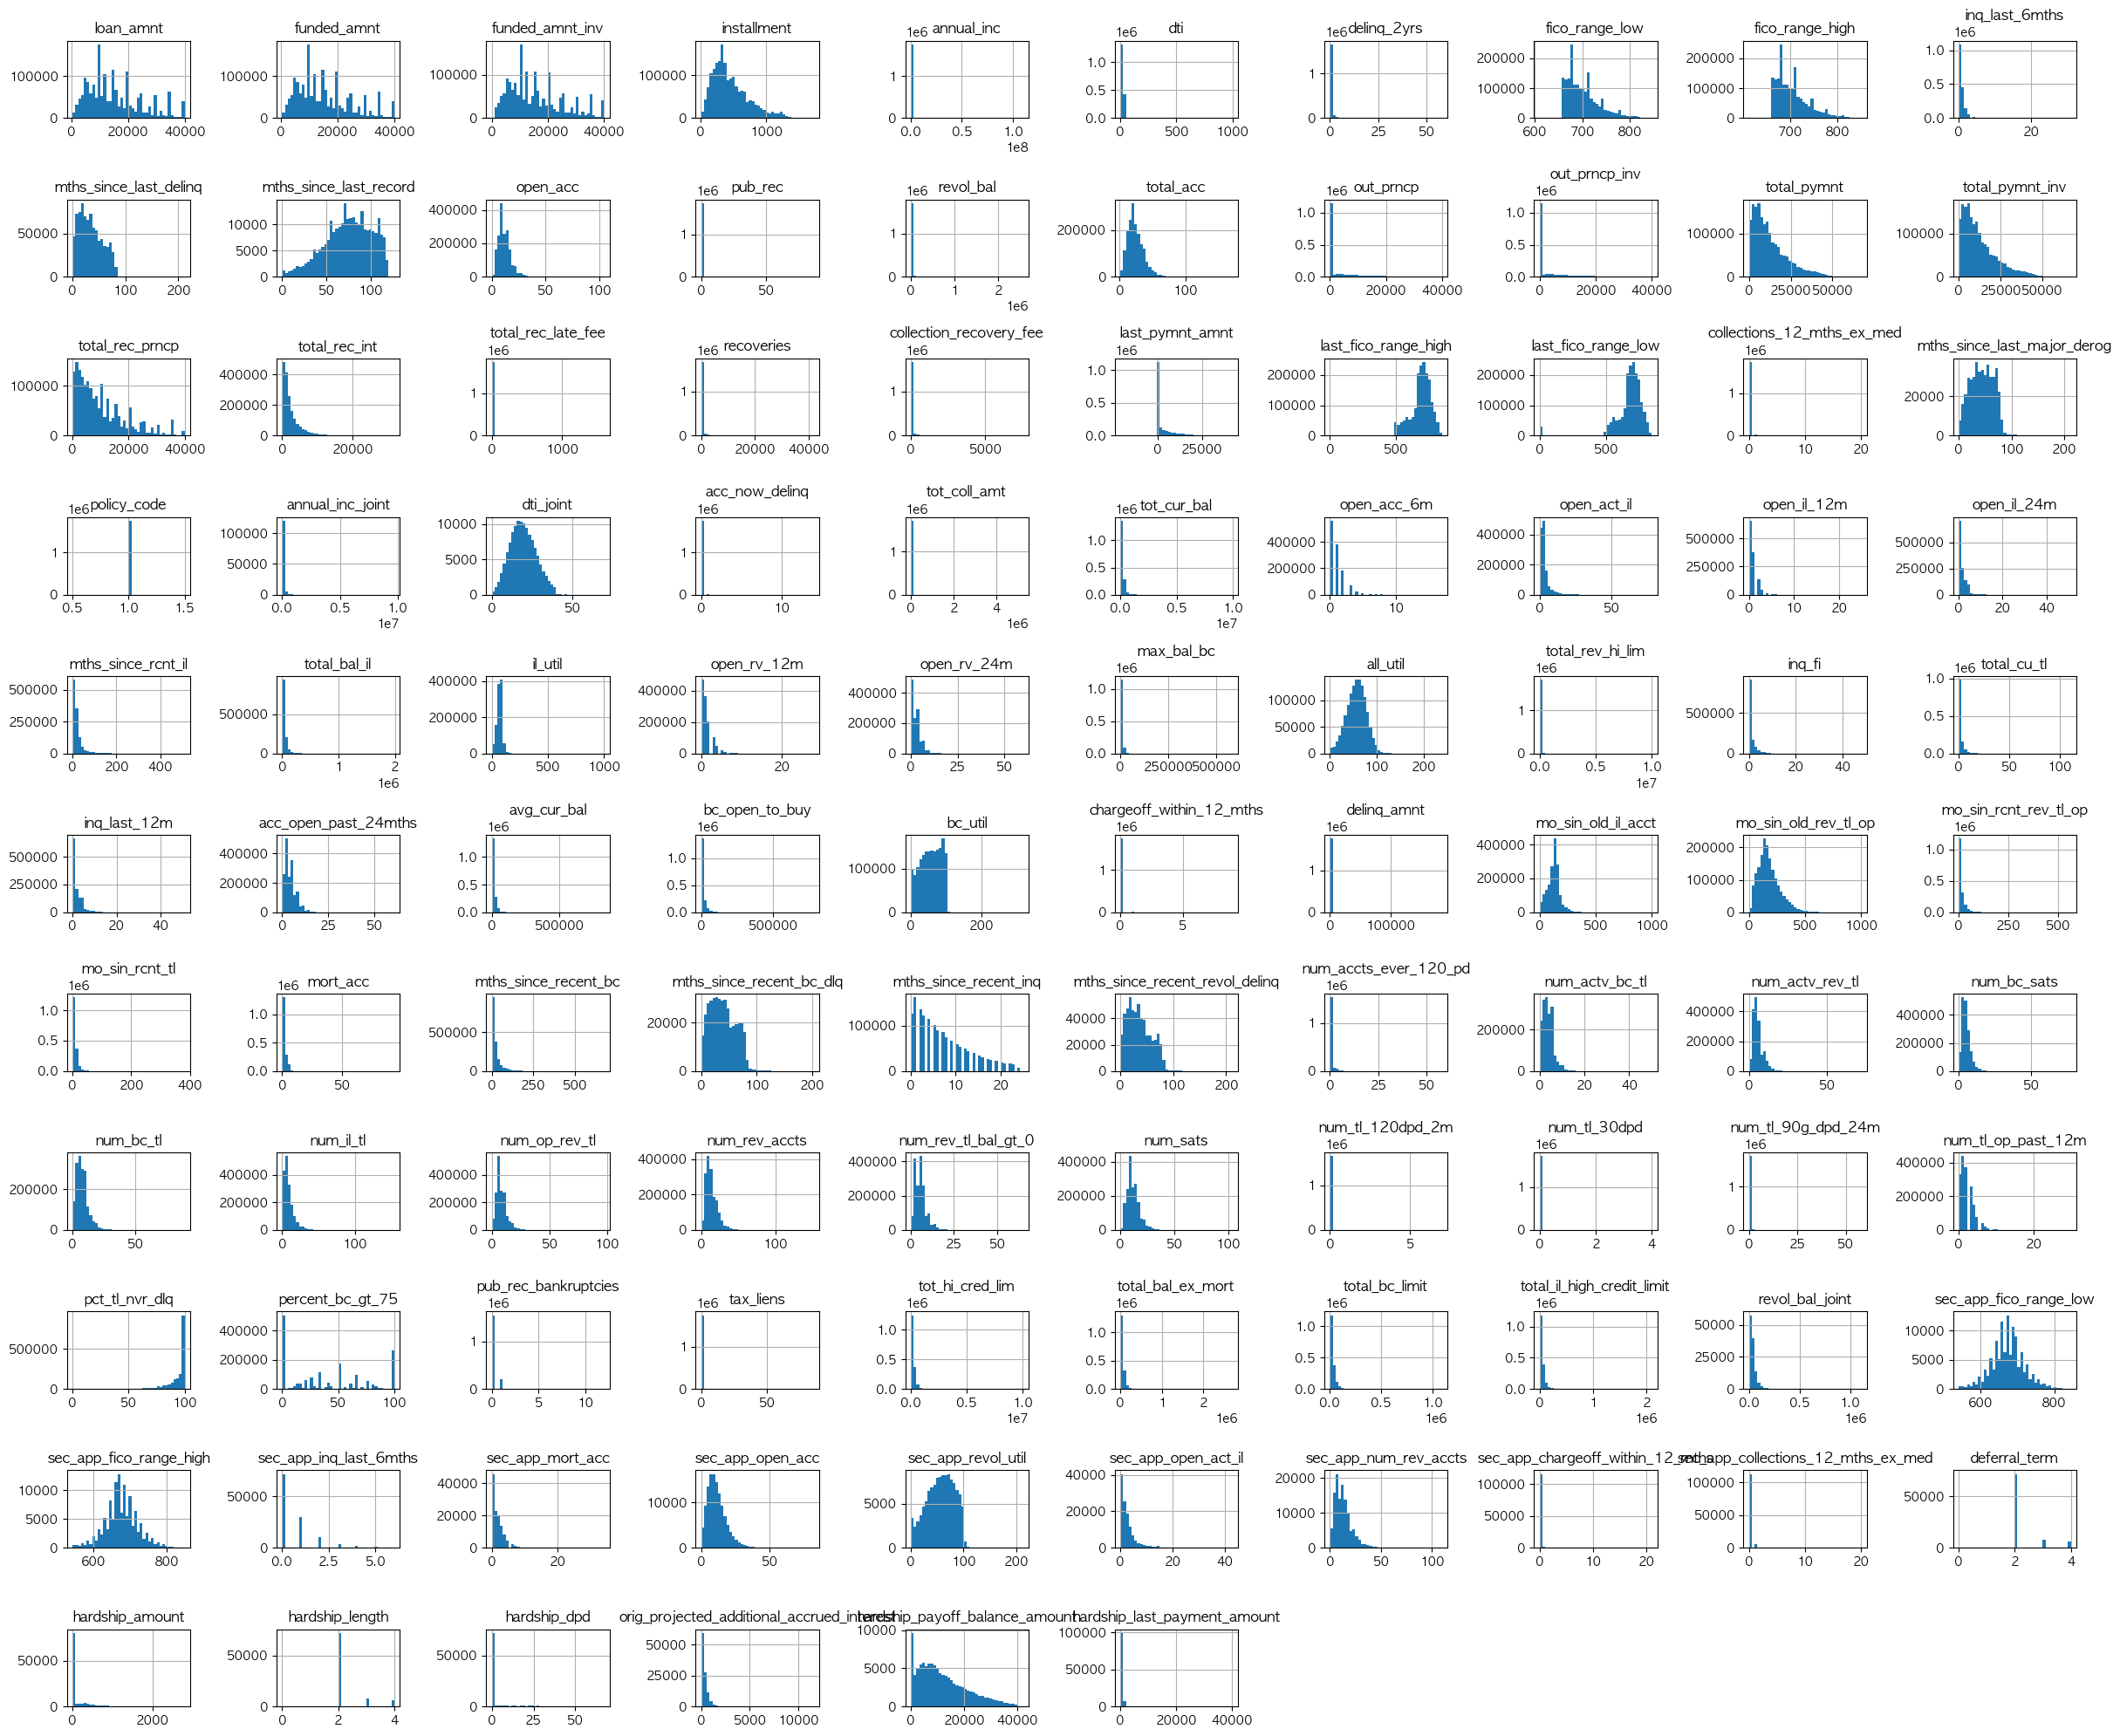

In [29]:
# 수치형 변수 전체 히스토그램
df[num_cols].hist(figsize=(24, 20), bins =40)
plt.tight_layout()
plt.show()